In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [2]:
df = pd.read_csv(r'C:\Users\intel\OneDrive\Desktop\data scientist project for githup\Clean_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## EDA

In [4]:
df.shape

(300153, 12)

In [5]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [8]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['Unnamed: 0'].unique()

array([     0,      1,      2, ..., 300150, 300151, 300152], dtype=int64)

In [11]:
df['airline'].unique()


array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [12]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [13]:
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [14]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [15]:
df['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [16]:
df['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [17]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [18]:
df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

### Visulization

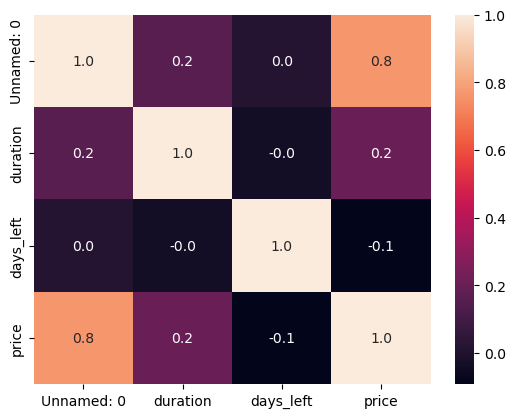

In [19]:
sns.heatmap(df.corr(numeric_only=True), annot=True,fmt='0.01f')
plt.show()

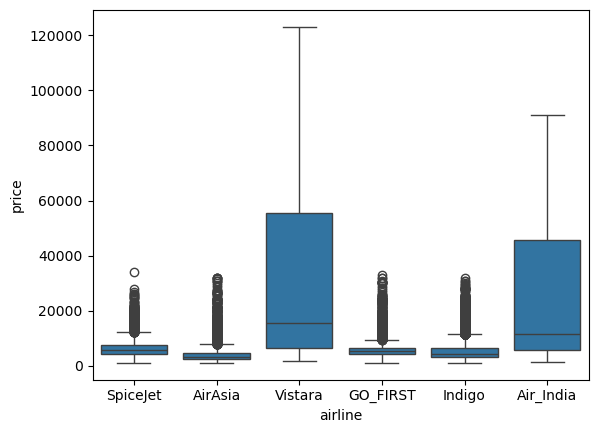

In [20]:
sns.boxplot(x='airline', y='price', data=df)
plt.show()


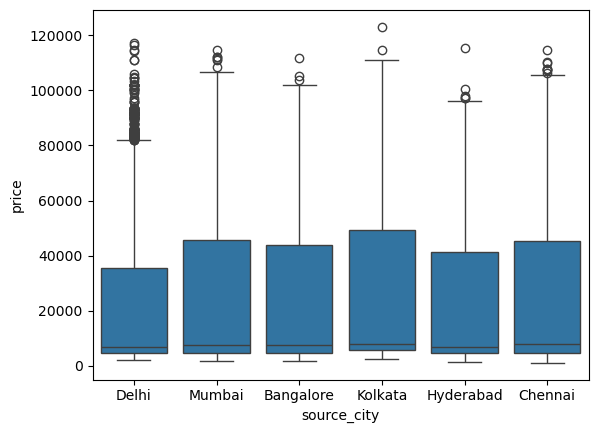

In [21]:
sns.boxplot(x='source_city', y='price', data=df)
plt.show()


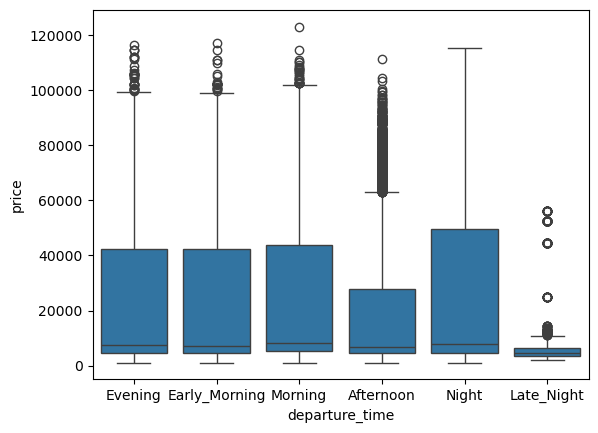

In [22]:
sns.boxplot(x='departure_time', y='price', data=df)
plt.show()


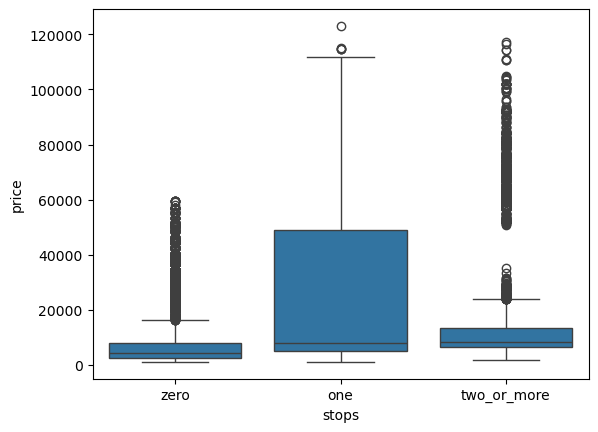

In [23]:
sns.boxplot(x='stops', y='price', data=df)
plt.show()


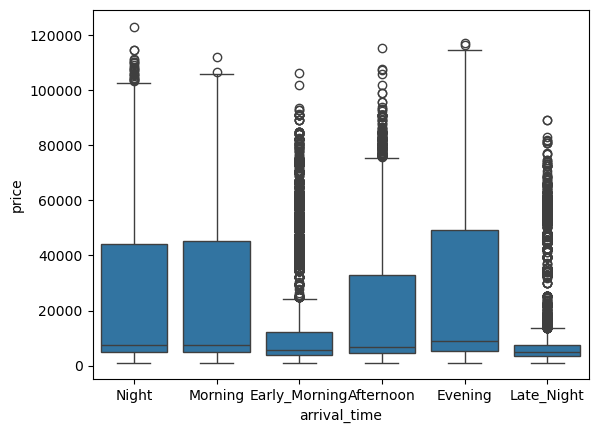

In [24]:
sns.boxplot(x='arrival_time', y='price', data=df)
plt.show()


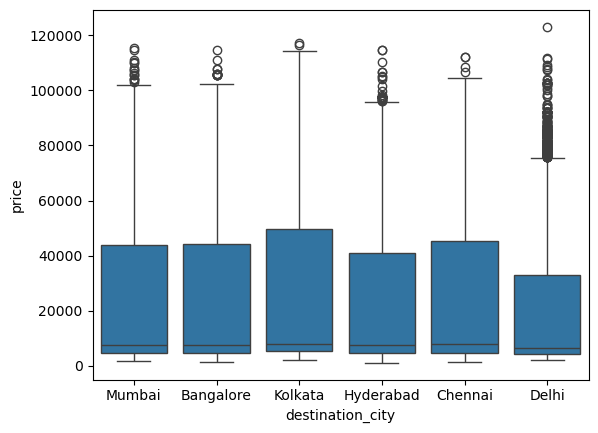

In [25]:
sns.boxplot(x='destination_city', y='price', data=df)
plt.show()

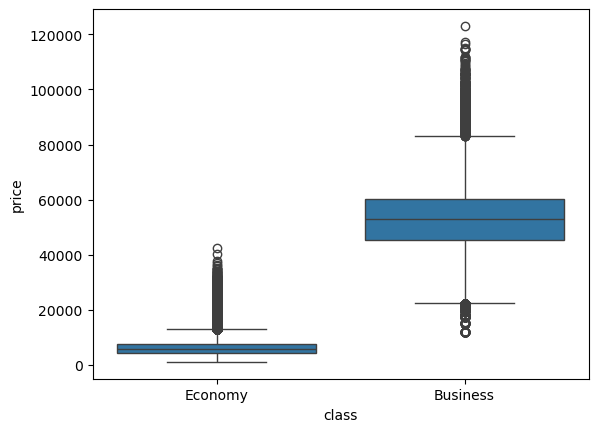

In [26]:
sns.boxplot(x='class', y='price', data=df)
plt.show()

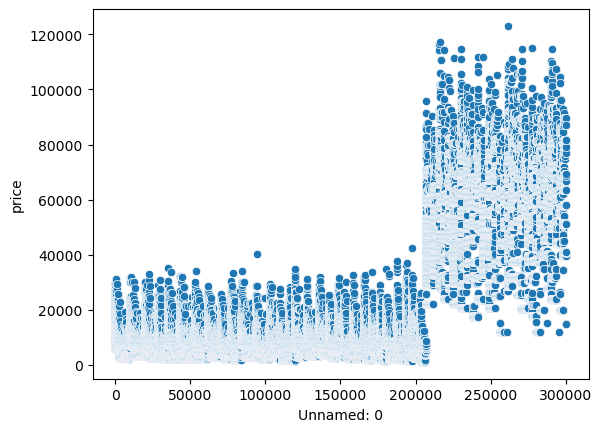

In [27]:
sns.scatterplot(x='Unnamed: 0', y='price', data=df)
plt.show()

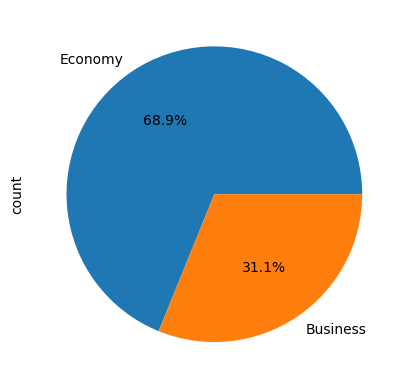

In [28]:
df['class'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()


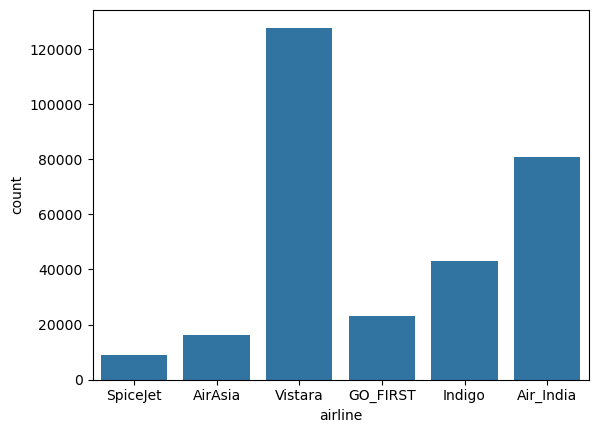

In [29]:
sns.countplot(x='airline', data=df)
plt.show()


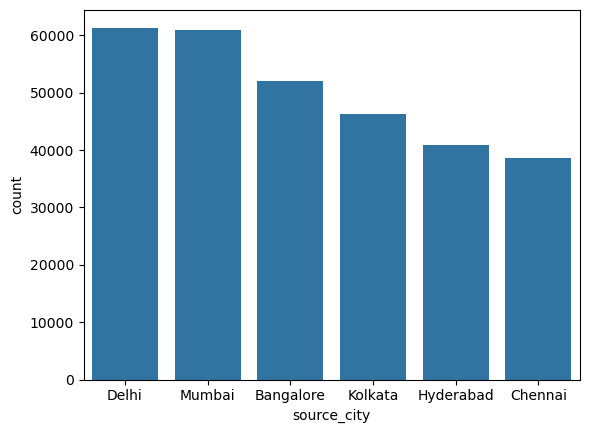

In [30]:
sns.countplot(x='source_city', data=df)
plt.show()


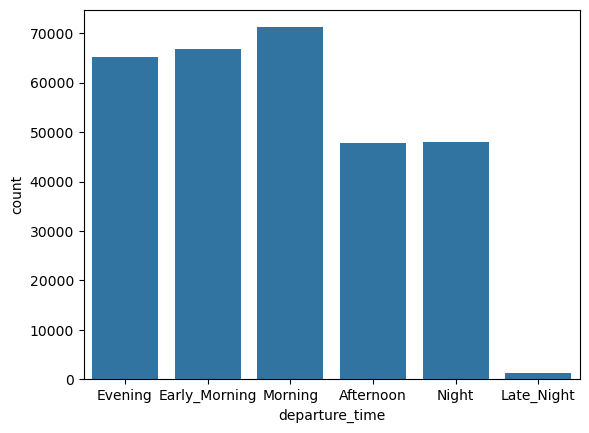

In [31]:
sns.countplot(x='departure_time', data=df)
plt.show()


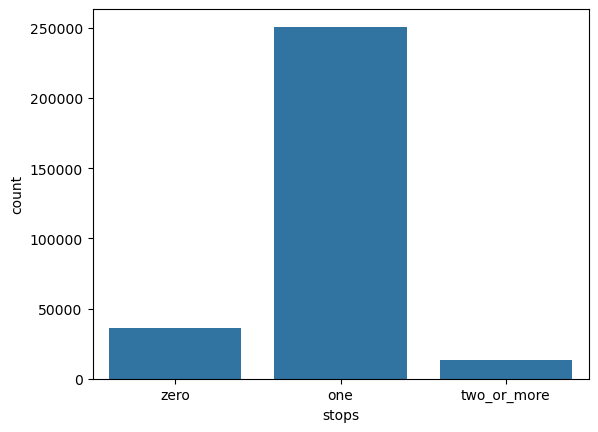

In [32]:
sns.countplot(x='stops', data=df)
plt.show()


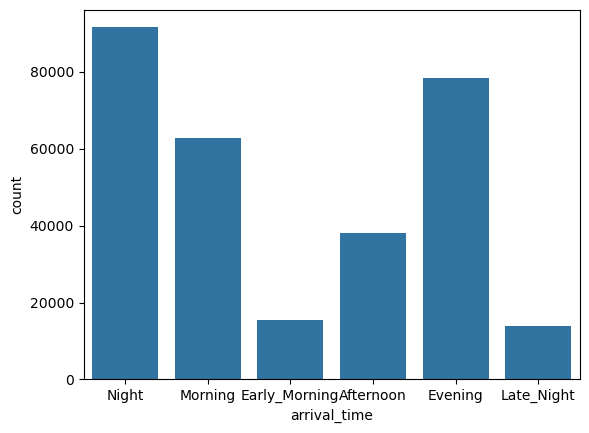

In [33]:
sns.countplot(x='arrival_time', data=df)
plt.show()


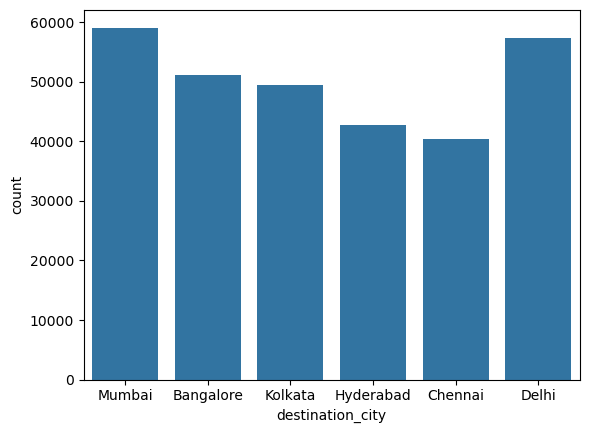

In [34]:
sns.countplot(x='destination_city', data=df)
plt.show()


## Preprocessing

In [35]:
object_columns=['airline','source_city','departure_time','stops','arrival_time','destination_city','class']
le=LabelEncoder()

for col in object_columns:
    df[col]=le.fit_transform(df[col])



In [36]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953
1,1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953
2,2,0,I5-764,2,1,2,1,5,1,2.17,1,5956
3,3,5,UK-995,2,4,2,0,5,1,2.25,1,5955
4,4,5,UK-963,2,4,2,4,5,1,2.33,1,5955


In [37]:
df.dtypes

Unnamed: 0            int64
airline               int32
flight               object
source_city           int32
departure_time        int32
stops                 int32
arrival_time          int32
destination_city      int32
class                 int32
duration            float64
days_left             int64
price                 int64
dtype: object

In [38]:
df=df.drop(columns=['Unnamed: 0','flight'],axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   source_city       300153 non-null  int32  
 2   departure_time    300153 non-null  int32  
 3   stops             300153 non-null  int32  
 4   arrival_time      300153 non-null  int32  
 5   destination_city  300153 non-null  int32  
 6   class             300153 non-null  int32  
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2)
memory usage: 14.9 MB


## Training The Model

In [40]:
x=df.drop(columns='price',axis=1)
y=df['price']

In [41]:
x_train,x_test,y_train,y_test = train_test_split( x , y , test_size=0.2 , random_state=42 )

In [42]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [43]:
y_pred = model.predict(x_test)

In [44]:

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 4624.9948680168245
MSE: 49200540.29372197
RMSE: 7014.309680483317
R² Score: 0.904554350718816


## Saving The Model

In [45]:
import pickle

with open("flight_price_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model saved successfully with pickle!")


✅ Model saved successfully with pickle!
